In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Unnamed: 5
0,165349.20,136897.80,471784.10,New York,192261.83,NaN
1,162597.70,151377.59,443898.53,California,191792.06,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39,NaN
3,144372.41,118671.85,383199.62,New York,182901.99,NaN
4,142107.34,91391.77,366168.42,Florida,166187.94,NaN


In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'Unnamed: 5'],
      dtype='object')

In [5]:
#Handle missing data

x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']]

In [6]:
x.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
x.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
#Encoding Categorical Data
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
X = pd.get_dummies(x, drop_first= True)

In [9]:
X.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [10]:
y = df[['Profit']]

In [11]:
# Spliting the dataset  

from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array([[5.49774410e+09],
       [3.31593803e+09],
       [4.09087892e+09],
       [2.65774484e+09],
       [5.13192467e+09],
       [1.46033867e+09],
       [4.32812586e+09],
       [4.39651709e+09],
       [3.98814676e+09],
       [5.02576394e+09],
       [5.79566309e+09],
       [6.80271952e+09],
       [3.68201943e+09],
       [6.23062979e+09],
       [7.48687952e+09],
       [6.39070899e+09],
       [3.18466804e+09]])

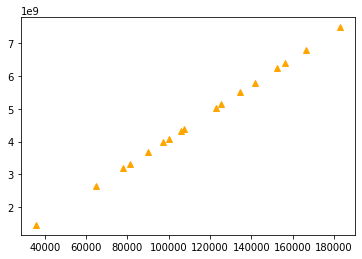

In [27]:
plt.plot(y_test, y_pred, '^', color ='orange')

In [29]:
from sklearn.metrics import accuracy_score,mean_squared_error
mean_squared_error(y_test, y_pred)

2.423386191992817e+19